# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_3m_0f_240214_1"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [40, 1870]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,420.028611,77.605534,423.094210,78.588833,0.0,469.000000,28.000000,0.462745,491.000000,103.000000,-1.510700,11674.0,167.546256,97.138019,0.814781,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,1118.337084,990.032178,1118.645302,988.109130,NaN,1118.337084,990.032178,NaN,1118.337084,990.032178,0.951667,10131.0,153.816184,99.780474,0.761045,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,1653.930417,961.651564,1643.979723,961.366501,NaN,1653.930417,961.651564,NaN,1653.930417,961.651564,-1.312880,15406.0,215.544289,96.629397,0.893881,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
73794,0,73797,1490.953177,85.392069,1478.560636,90.331142,NaN,1490.953177,85.392069,NaN,1490.953177,85.392069,-1.285105,10465.0,229.923372,77.244056,0.941878,3,3.0,0.006990,0.017669,0.000547,False,False,False
73795,1,73797,1749.595781,554.688378,1749.578644,556.052993,NaN,1753.564345,536.597705,NaN,1752.564345,538.597705,0.203129,2603.0,96.030915,53.291388,0.831890,3,3.0,0.011936,-0.065246,-0.005584,False,False,False
73796,2,73797,1708.757589,952.882556,1702.061423,959.154484,0.0,1796.000000,838.000000,0.368627,1768.000000,857.000000,-0.700043,11035.0,273.229718,80.376724,0.955752,3,3.0,0.092212,-0.134000,-0.000765,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 40000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 60000, velocity_threshold, omega_threshold, True],
    [60000, 73800, velocity_threshold, omega_threshold, True]#,
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108311, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 7/7 [00:42<00:00,  6.02s/it]


Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]
Time: 60000 Chunks 2 Allowed time 60000 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,420.028611,77.605534,423.094210,78.588833,0.0,469.000000,28.000000,0.462745,491.000000,103.000000,-1.510700,-1.510700,11674.0,167.546256,97.138019,0.814781,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,1118.337084,990.032178,1118.645302,988.109130,NaN,1118.337084,990.032178,NaN,1118.337084,990.032178,0.951667,0.951667,10131.0,153.816184,99.780474,0.761045,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,1653.930417,961.651564,1643.979723,961.366501,NaN,1653.930417,961.651564,NaN,1653.930417,961.651564,-1.312880,-1.312880,15406.0,215.544289,96.629397,0.893881,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,422.991475,76.499503,427.473575,76.898430,0.0,454.000000,25.000000,0.486275,346.000000,94.000000,-1.463450,-1.463450,12082.0,183.773084,98.064733,0.845725,3,3.0,0.987621,-0.368677,0.015750,False,False,False
4,True,3,chunk_00000_10000,1,1,1095.888973,976.237135,1093.085004,973.029138,0.0,1009.000000,883.000000,0.650980,985.000000,890.000000,0.998304,0.998304,13195.0,239.934108,94.135339,0.919821,3,3.0,-7.482704,-4.598348,0.015545,False,False,False
5,True,3,chunk_00000_10000,2,2,1654.007984,961.685707,1644.116726,961.372204,0.0,1654.000000,908.000000,0.533333,1592.000000,1007.000000,-1.311958,-1.311958,15406.0,215.241517,96.801010,0.893164,3,3.0,0.025856,0.011381,0.000307,False,False,False
6,True,6,chunk_00000_10000,0,0,423.111277,76.460908,427.620982,76.849639,0.0,454.000000,25.000000,0.486275,428.000000,97.000000,-1.463571,-1.463571,12087.0,183.970949,98.029256,0.846209,3,3.0,0.039934,-0.012865,-0.000040,False,False,False
7,True,6,chunk_00000_10000,1,1,1096.905540,977.171473,1094.386816,974.258394,NaN,1096.905540,977.171473,NaN,1096.905540,977.171473,1.002439,1.002439,12725.0,239.658465,95.563464,0.917060,3,3.0,0.338856,0.311446,0.001378,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
73792,True,73794,chunk_60000_73800,1,1,1749.559974,554.884116,1749.552753,556.321166,NaN,1754.879883,536.407672,NaN,1752.546549,538.741005,0.219881,-0.219881,2631.0,94.774225,53.029073,0.828810,3,3.0,0.047926,0.130326,-0.000281,False,False,False
73791,True,73794,chunk_60000_73800,0,2,1490.932207,85.339062,1478.570806,90.211366,NaN,1490.932207,85.339062,NaN,1490.932207,85.339062,-1.286745,-1.286745,10473.0,229.925328,77.110329,0.942086,3,3.0,-12.571962,4.853403,-0.081685,False,False,False
73796,True,73797,chunk_60000_73800,2,0,1708.757589,952.882556,1702.061423,959.154484,0.0,1796.000000,838.000000,0.368627,1768.000000,857.000000,-0.700043,-0.700043,11035.0,273.229718,80.376724,0.955752,3,3.0,0.092212,-0.134000,-0.000765,False,False,False
73795,True,73797,chunk_60000_73800,1,1,1749.595781,554.688378,1749.578644,556.052993,NaN,1753.564345,536.597705,NaN,1752.564345,538.597705,0.203129,-0.203129,2603.0,96.030915,53.291388,0.831890,3,3.0,0.011936,-0.065246,-0.005584,False,False,False
73794,True,73797,chunk_60000_73800,0,2,1490.953177,85.392069,1478.560636,90.331142,NaN,1490.953177,85.392069,NaN,1490.953177,85.392069,-1.285105,-1.285105,10465.0,229.923372,77.244056,0.941878,3,3.0,0.006990,0.017669,0.000547,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 15.447543144733043 
	- Angle: 15.41235262555891 



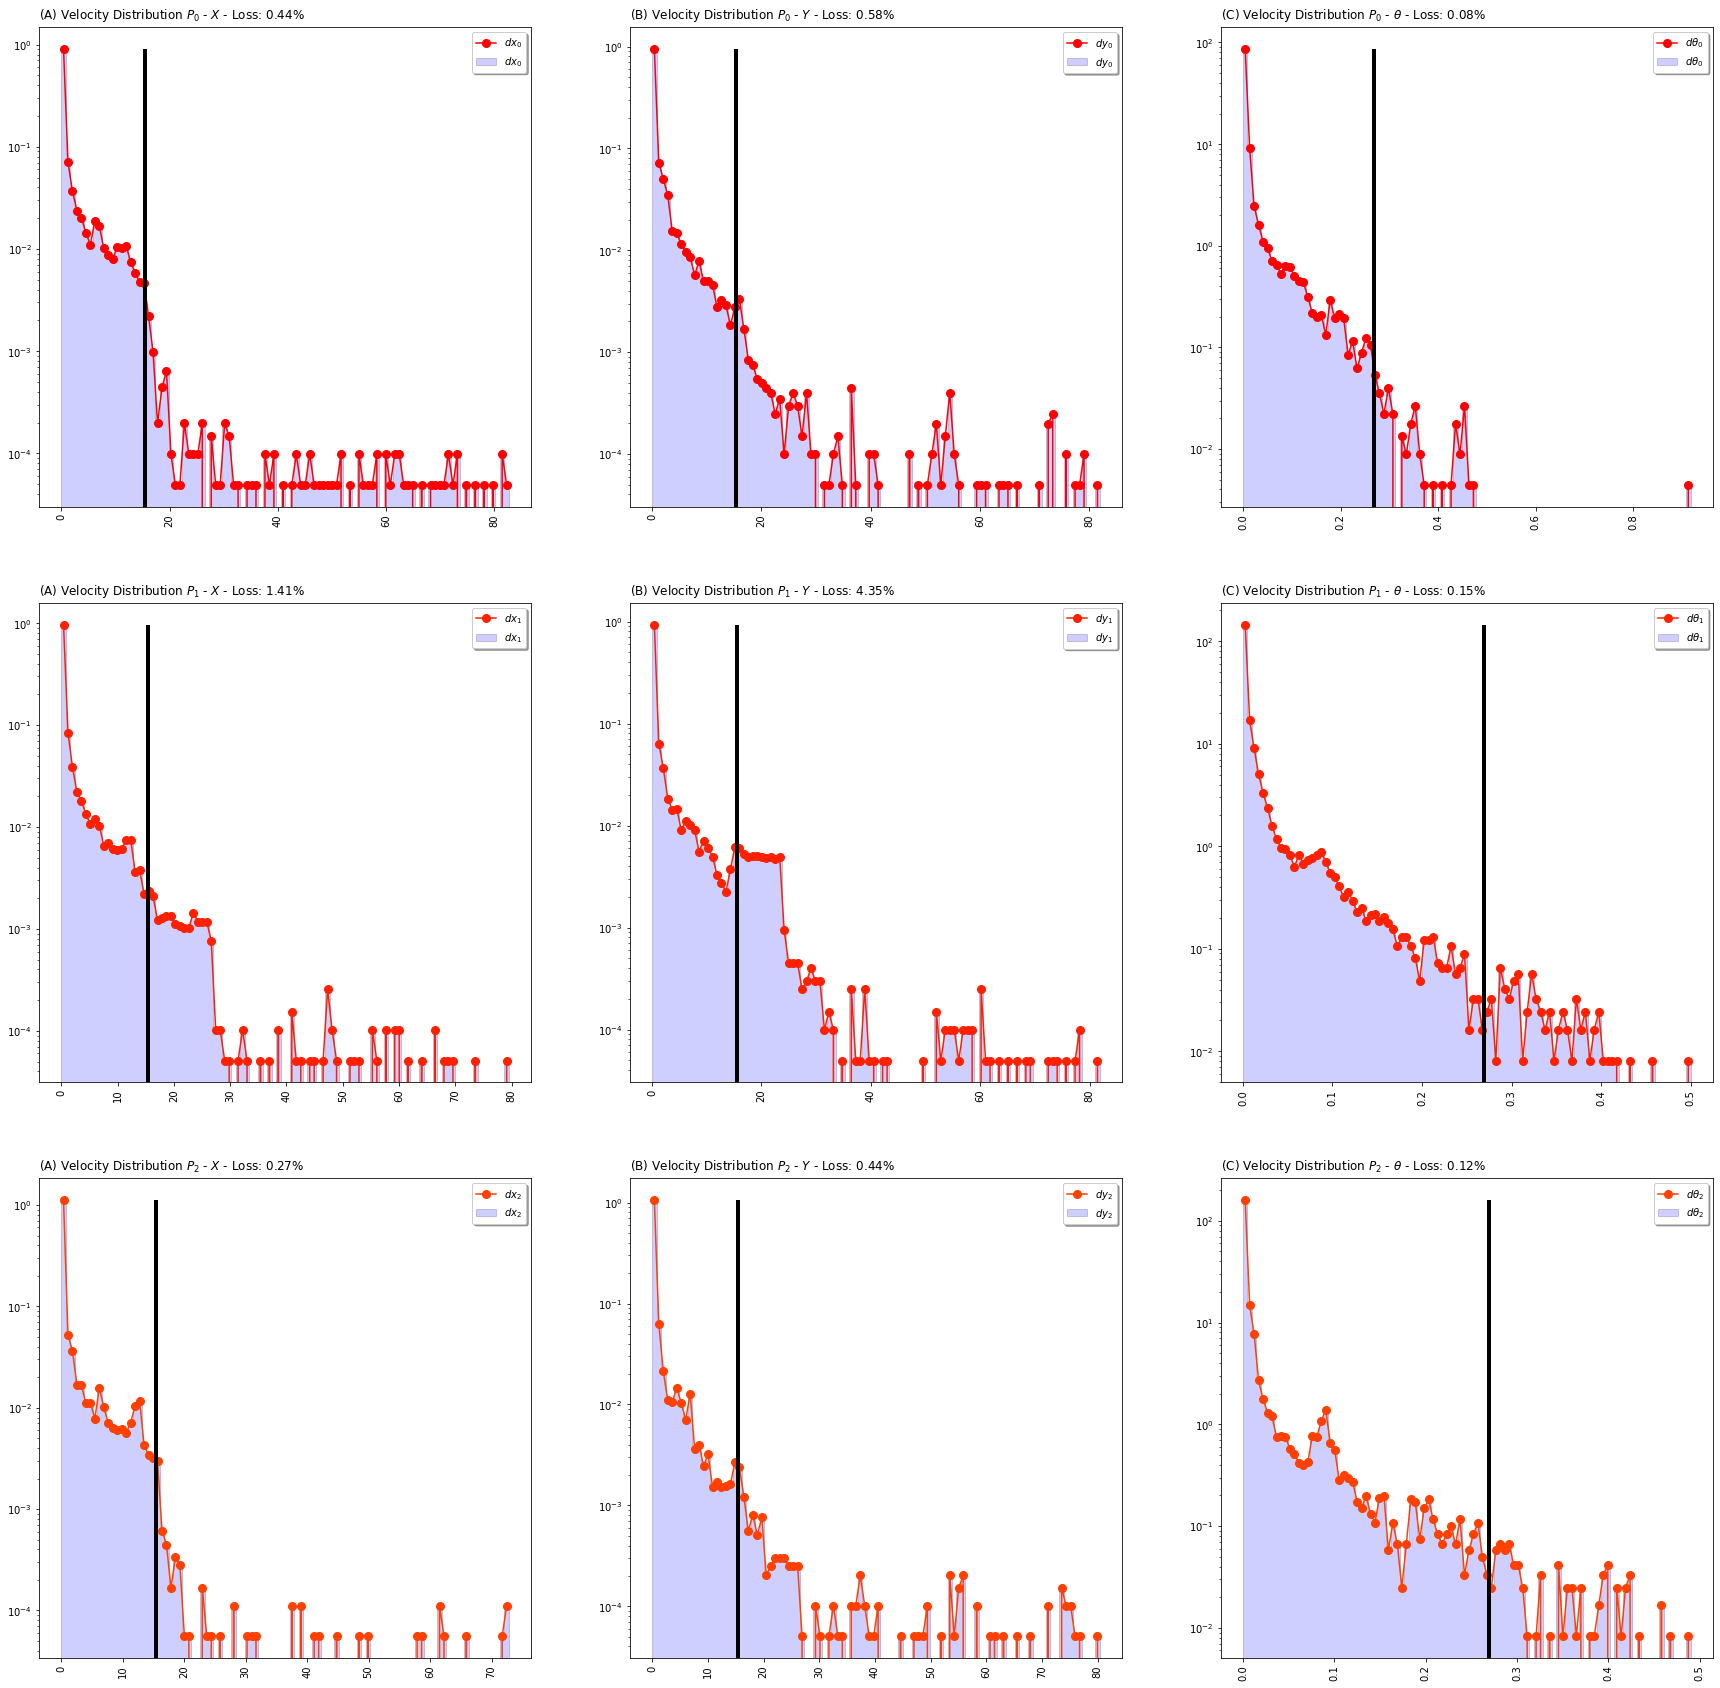

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


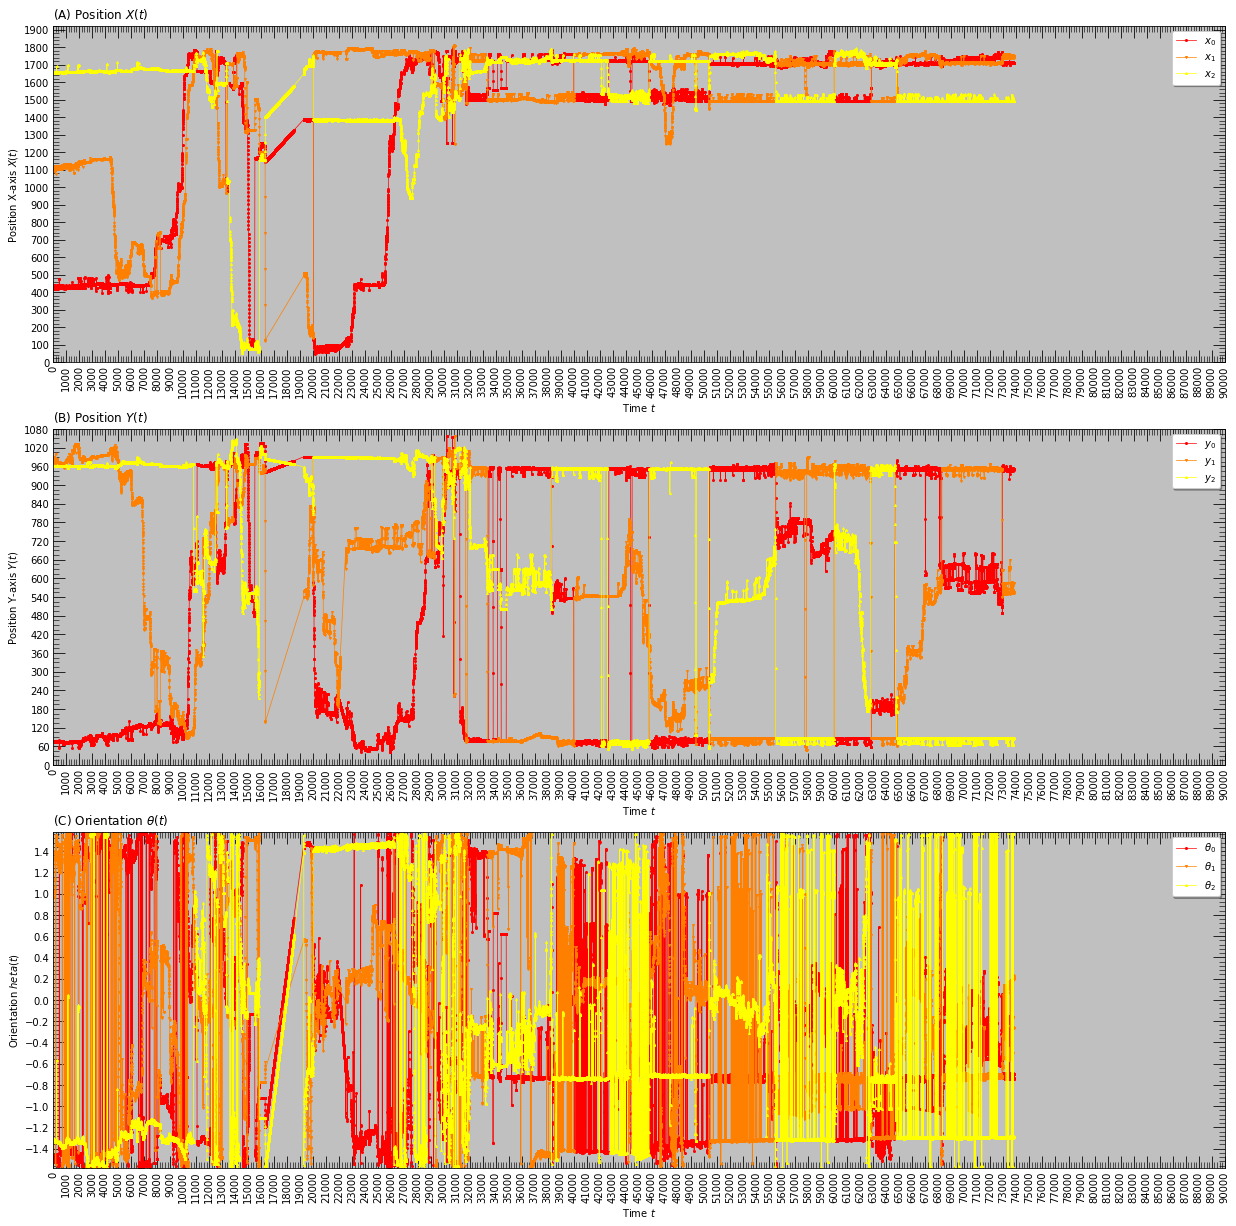

Corrected Orientation


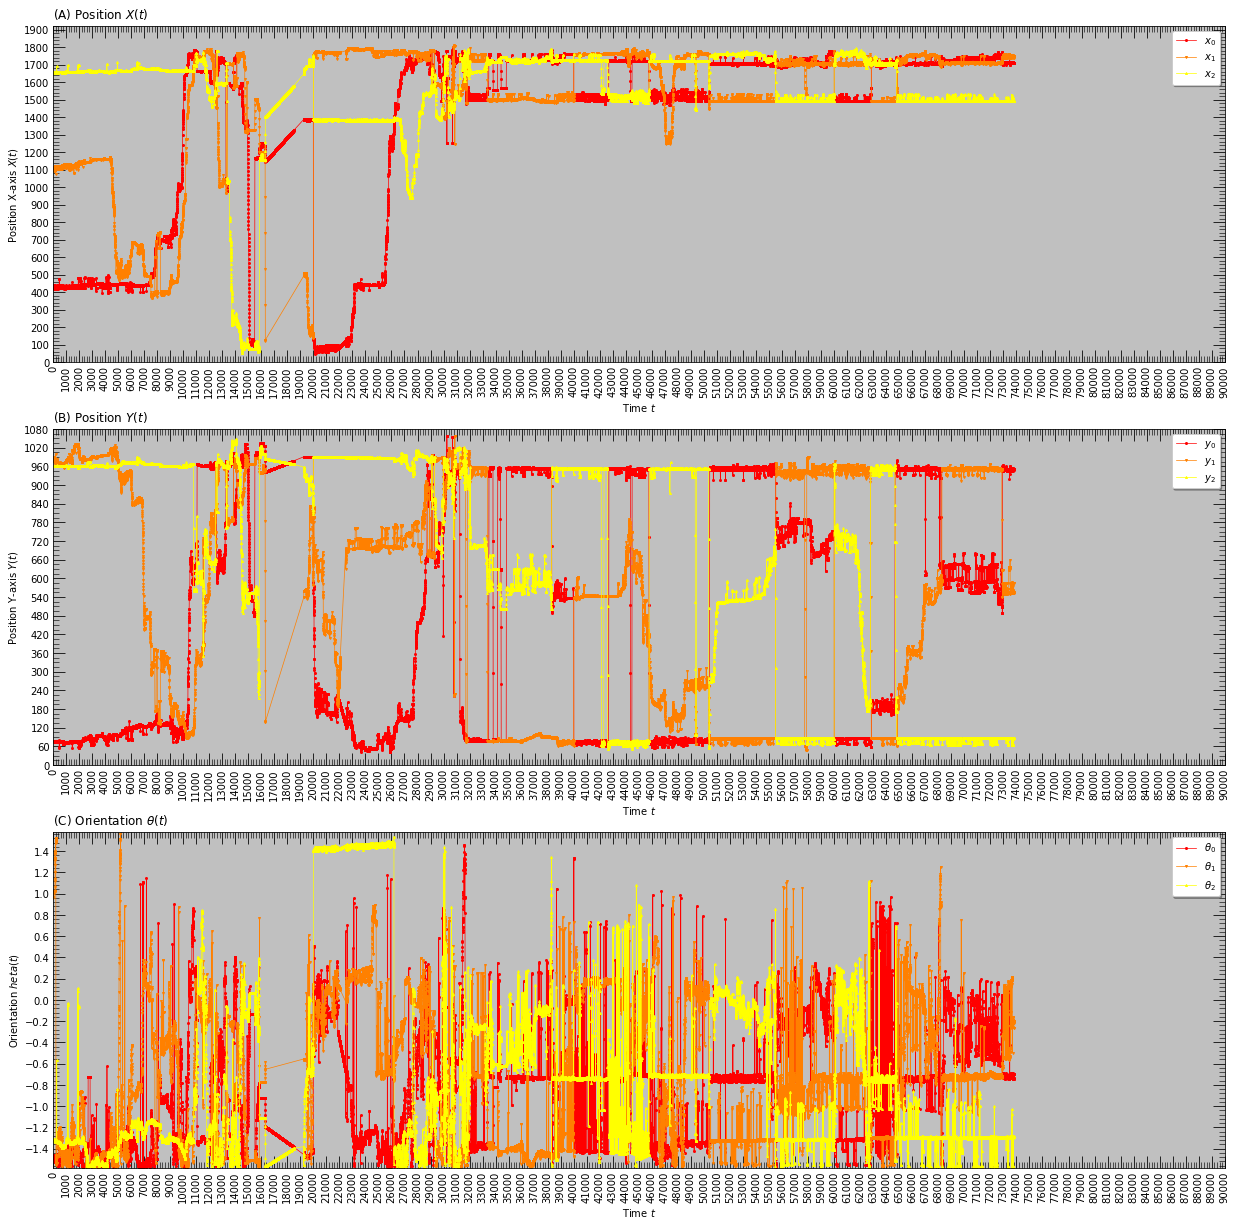

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )